# Мастерская №1

### Задача

Провести анализ изменения цены лечения в медицинской клинике в 2022 году относительно 2021 года

### Цель проекта:

Определить ключевые драйверы изменения цены лечения и дать прогнозы по изменению цен

### Описание данных:

**record_id** - уникальный идентификатор строки данных;

**service_date** - дата оказания медицинской услуги;

**service_name** - наименование медицинской услуги;

**service_number** - количество услуг;

**service_amount** - сумма выплат (стоимость оказанных услуг в рублях);

**insured** - уникальный идентификатор пациента;

**sex_id** - пол пациента;

**age_for_service_date** - возраст пациента.

**Импортируем библиотеки**

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.float_format = '{:,.2f}'.format

**Прочитаем файл**

Посмотрим на исходную таблицу

In [2]:
data = pd.read_excel('data_test_task_2022.xlsx')

In [3]:
data.head(20)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,2.00,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,2.00,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,2.00,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,2.00,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,2.00,26
5,30268157503,2021-01-24,С-реактивный белок,420,1,490777,2.00,26
6,30268157603,2021-01-24,Взятие крови из периферической вены,158,1,490777,2.00,26
7,30268157703,2021-01-26,Прием первичный,1470,1,490777,2.00,26
8,30268157803,2021-01-26,Магнитотерапия (1 сеанс),1040,1,490777,2.00,26
9,30268157903,2021-01-26,УВЧ-терапия (1 сеанс) (1 поле),1040,1,490777,2.00,26


**Посмотрим на типы данных**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85369 entries, 0 to 85368
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   record_id             85369 non-null  int64  
 1   service_date          85369 non-null  object 
 2   service_name          85369 non-null  object 
 3   service_amount        85369 non-null  int64  
 4   service_number        85369 non-null  int64  
 5   insured               85369 non-null  int64  
 6   sex_id                85348 non-null  float64
 7   age_for_service_date  85369 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 5.2+ MB


**Посмотрим нулевые значения**

In [5]:
data.isna().sum()

record_id                0
service_date             0
service_name             0
service_amount           0
service_number           0
insured                  0
sex_id                  21
age_for_service_date     0
dtype: int64

In [6]:
data.describe()

,record_id,service_amount,service_number,insured,sex_id,age_for_service_date
count,"85,369.00","85,369.00","85,369.00","85,369.00","85,348.00","85,369.00"
mean,"31,799,826,572.25","1,166.09",1.02,"654,916.29",1.62,33.85
std,"837,064,983.00",799.06,0.23,"262,335.58",0.49,12.14
min,"30,268,157,003.00",147.00,1.00,"125,073.00",1.00,0.00
25%,"31,111,934,803.00",550.00,1.00,"509,690.00",1.00,27.00
50%,"31,814,131,003.00","1,155.00",1.00,"651,895.00",2.00,34.00
75%,"32,511,163,303.00","1,530.00",1.00,"822,728.00",2.00,41.00
max,"33,178,147,203.00","26,999.00",16.00,"1,306,795.00",2.00,83.00


**Замечания**

Сразу заметим, что судя по характеру процедур в графе sex_id можно заметить, что 2.0 -  id женского пола, а 1.0 -id мужского пола, сразу заменим их на 'мужской' и 'женский' для упрощения анализа и визуализации.



In [7]:
data['sex_id'] = data['sex_id'].replace(1.0, 'мужской')
data['sex_id'] = data['sex_id'].replace(2.0, 'женский')

In [8]:
data['sex_id'].unique()

array(['женский', 'мужской', nan], dtype=object)

Присутствуют нули, скорее всего пациает, либо администратор не заполнили у каких-то клиентов пол.

In [9]:
data

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,женский,26
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,женский,26
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,женский,26
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,женский,26
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,женский,26
...,...,...,...,...,...,...,...,...
85364,33178146803,2022-08-20,Общий анализ мочи,495,1,935341,женский,30
85365,33178146903,2022-08-20,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",800,1,935341,женский,30
85366,33178147003,2022-08-20,АЧТВ (активированное частичное тромбопластинов...,300,1,935341,женский,30
85367,33178147103,2022-08-20,Протромбин (МНО),410,1,935341,женский,30


**Поменяем тип данных в столбце service_date:**

In [10]:
data['service_date'] = pd.to_datetime(data['service_date'], format='%Y-%m-%d')

**Добавим столбцы с год, год-месяц, номер месяца:**

In [11]:
# Добавляем столбцы с год, год-месяц, номер месяца:
data['year'] = data['service_date'].dt.year
data["year_month"] = data["service_date"].dt.to_period("M")
data["month"] = pd.to_datetime(data["service_date"]).dt.month
data

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,year_month,month
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,женский,26,2021,2021-01,1
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,женский,26,2021,2021-01,1
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,женский,26,2021,2021-01,1
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,женский,26,2021,2021-01,1
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,женский,26,2021,2021-01,1
...,...,...,...,...,...,...,...,...,...,...,...
85364,33178146803,2022-08-20,Общий анализ мочи,495,1,935341,женский,30,2022,2022-08,8
85365,33178146903,2022-08-20,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",800,1,935341,женский,30,2022,2022-08,8
85366,33178147003,2022-08-20,АЧТВ (активированное частичное тромбопластинов...,300,1,935341,женский,30,2022,2022-08,8
85367,33178147103,2022-08-20,Протромбин (МНО),410,1,935341,женский,30,2022,2022-08,8


**Добавим стоимость услуг за единицу:**

In [12]:
data['per_unit'] = data['service_amount']/data['service_number']
data

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,year_month,month,per_unit
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,женский,26,2021,2021-01,1,"1,470.00"
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,женский,26,2021,2021-01,1,284.00
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,женский,26,2021,2021-01,1,"1,134.00"
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,женский,26,2021,2021-01,1,693.00
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,женский,26,2021,2021-01,1,420.00
...,...,...,...,...,...,...,...,...,...,...,...,...
85364,33178146803,2022-08-20,Общий анализ мочи,495,1,935341,женский,30,2022,2022-08,8,495.00
85365,33178146903,2022-08-20,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",800,1,935341,женский,30,2022,2022-08,8,800.00
85366,33178147003,2022-08-20,АЧТВ (активированное частичное тромбопластинов...,300,1,935341,женский,30,2022,2022-08,8,300.00
85367,33178147103,2022-08-20,Протромбин (МНО),410,1,935341,женский,30,2022,2022-08,8,410.00


**Посмотрим на дубликаты:**

In [13]:
data.duplicated().sum()

0

**Посмотрим на статистику доходов по месяцам**

In [14]:
data_rev = data.pivot_table(index = ['year','month'], values='service_amount', aggfunc='sum').reset_index()
data_rev.style.format("{:,.2f}") 

,year,month,service_amount
0,"2,021.00",1.00,"2,265,931.00"
1,"2,021.00",2.00,"2,379,125.00"
2,"2,021.00",3.00,"3,927,248.00"
3,"2,021.00",4.00,"4,380,487.00"
4,"2,021.00",5.00,"4,298,978.00"
5,"2,021.00",6.00,"4,522,585.00"
6,"2,021.00",7.00,"3,872,209.00"
7,"2,021.00",8.00,"4,310,989.00"
8,"2,021.00",9.00,"4,782,859.00"
9,"2,021.00",10.00,"6,063,580.00"


**Цифры - это хорошо, но лучше визуализировать. Этиим и займёмся**

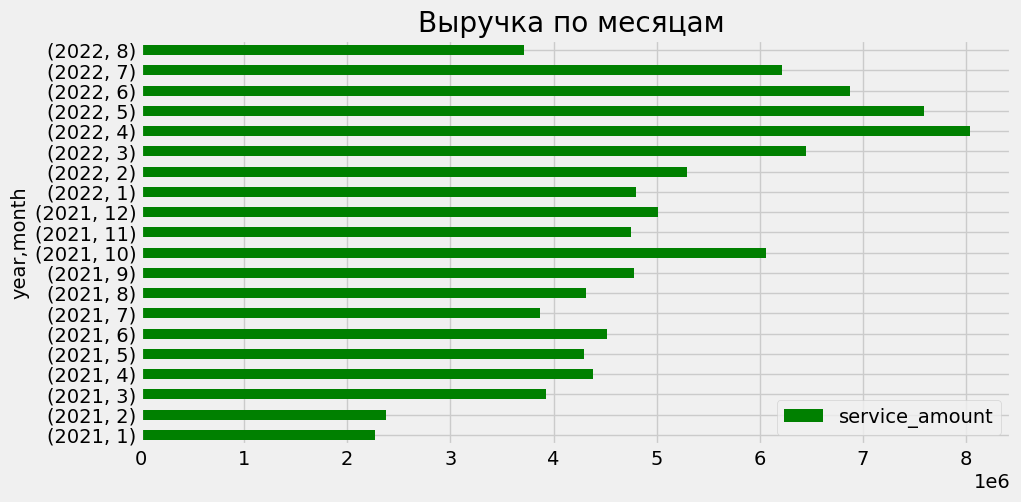

In [15]:
data_rev.pivot_table(index=['year','month'], values='service_amount', aggfunc='sum') \
.plot(y='service_amount',grid=True,figsize=(10, 5),title='Выручка по месяцам ', kind='barh',color = 'green');

Получается самый доходный был Апрель 2022 года

**Посмотрим на сравнение выручки от года к году**

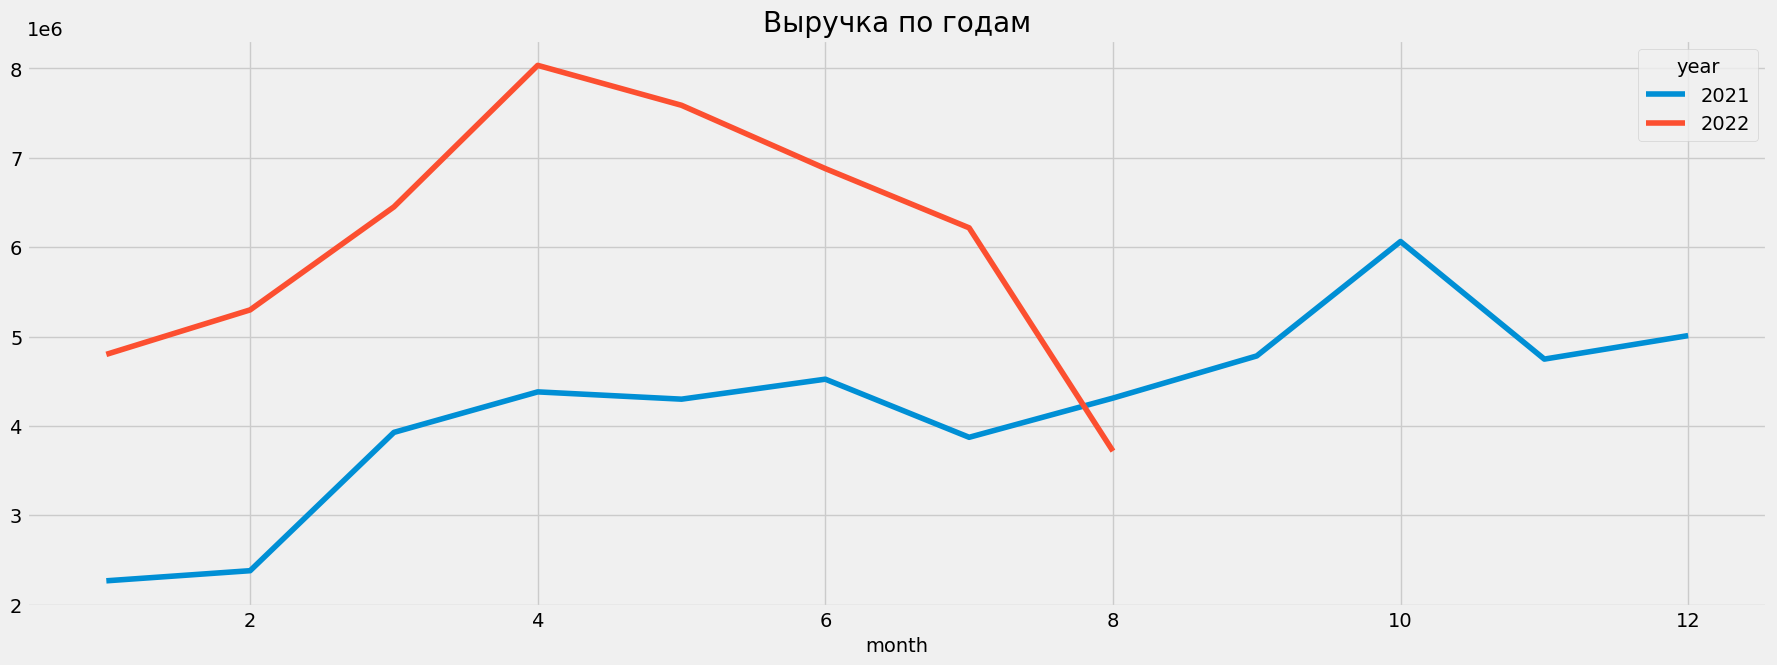

In [16]:
data.pivot_table(
    index='month',
    columns='year',
    values='service_amount',  
    aggfunc='sum'  
).plot(figsize=(20, 7), grid=True, title='Выручка по годам')

plt.show()

Позитивная динамика видна на лицо, с **ноября 2021 года** цена повышалась, потом чуть-чуть уменьшималь ближе к **августу 2022 года**, к сожалению данных после августа нам не предоставили, стало быть будем работать с тем что есть.

**Создадим табличку для равного сравнения 2021 и 2022 года**

Поскольку у нас есть данные только до августа 2022 года, целесообразно сравнивать 2021 до 8 месяца включительно и 2022 до 8 месяца включительно

In [17]:
data_comparable = data.query('month < 9')
data_comparable

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,year_month,month,per_unit
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,женский,26,2021,2021-01,1,"1,470.00"
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,женский,26,2021,2021-01,1,284.00
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,женский,26,2021,2021-01,1,"1,134.00"
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,женский,26,2021,2021-01,1,693.00
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,женский,26,2021,2021-01,1,420.00
...,...,...,...,...,...,...,...,...,...,...,...,...
85364,33178146803,2022-08-20,Общий анализ мочи,495,1,935341,женский,30,2022,2022-08,8,495.00
85365,33178146903,2022-08-20,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",800,1,935341,женский,30,2022,2022-08,8,800.00
85366,33178147003,2022-08-20,АЧТВ (активированное частичное тромбопластинов...,300,1,935341,женский,30,2022,2022-08,8,300.00
85367,33178147103,2022-08-20,Протромбин (МНО),410,1,935341,женский,30,2022,2022-08,8,410.00


**Сравним доходы исходя из новой таблички**

In [18]:
t = data_comparable.groupby('year').agg(\
            {'insured': 'count',
                'service_amount': 'sum',}              
            )\
        .sort_values(by=['insured', 'service_amount'], ascending = False).reset_index()
t.style.format("{:,.0f}")

,year,insured,service_amount
0,"2,022","40,977","48,986,662"
1,"2,021","26,736","29,957,552"


Доходы выросли 1.6 раза, пропорционально выросло и количество пользователей

### Теперь посмотрим на услуги

In [73]:
data['service_name'].unique()

array(['Прием первичный',
       'Взятие материала на посев, цитологическое исследование ( риноцитограмма)',
       'Посев отдел, дыхательных путей - слизистая зева с определением чувствительности к антибиотикам',
       'Общий анализ крови (лейкоцитарная форм,, СОЭ)',
       'Ревматоидный фактор', 'С-реактивный белок',
       'Взятие крови из периферической вены', 'Магнитотерапия (1 сеанс)',
       'УВЧ-терапия (1 сеанс) (1 поле)', 'Прием повторный',
       'Смазывание глотки лекарственными формами', 'Взятие мазка',
       'Обработка вульвы', 'Обработка шейки матки',
       'Гинекологический мазок', 'Общий анализ мочи', 'Креатинин',
       'Мочевая кислота', 'Мочевина', 'Общий белок',
       'Ультразвуковое исследование почек и надпочечников',
       'Ультразвуковое исследование мочевого пузыря',
       'ЛПНП (липопротеиды низкой плотности, бета-липопротеиды)',
       'Триглицериды', 'Холестерин', 'АЛТ (аланинаминотрансфераза)',
       'Альдостерон', 'Кортизол (кровь)', 'Ренин + Ангио

In [26]:
data['insured'].nunique()

4488

**Очевидно их слишком много для адекватного анализа, попробуем их категоризировать**

Создадим словарь и применин его

In [28]:
classification_dict = {'Первичная консультация':['первичный'], 
                  'Повторная консультация':['повторный'],
                  'Анализы': ['анализ', 'белок','мазок','соскоб','исследование'],
                  'Узи':['узи','ультразвуковое'], 
                  'Имунные реакции':['аллерго'], 
                  'Маммология': ['молочной'], 
                  'Гинекология': ['цитологи','шейки','гинеколог','матки','эрозия', 'эндометрия'],
                  'Хирургия':['папилом','укдаление', 'пункция'],
                  'Рентген':['рентгенография', 'мрт'],
                  'Перевязка':['перевязка'],
                  'Массаж': ['мануальная', 'массаж']
}

In [29]:
def categorize_purpose(purpose):
    for category, items_list in classification_dict.items():
        for item in items_list:
            if item in purpose:
                return category
    return 'Другое'

In [38]:
data_comparable['category_name']  = data['service_name'].apply(categorize_purpose)

**В итоге получились следующие категории, теперь с данными проще работать.**

In [40]:
data_comparable['category_name'].unique()

array(['Первичная консультация', 'Анализы', 'Другое',
       'Повторная консультация', 'Гинекология', 'Массаж', 'Маммология',
       'Рентген', 'Узи', 'Хирургия', 'Имунные реакции'], dtype=object)

In [75]:
data_comparable.head(20)

,record_id,service_date,service_name,service_amount,service_number,insured,sex_id,age_for_service_date,year,year_month,month,per_unit,category_name
0,30268157003,2021-01-24,Прием первичный,1470,1,490777,женский,26,2021,2021-01,1,"1,470.00",Первичная консультация
1,30268157103,2021-01-24,"Взятие материала на посев, цитологическое иссл...",284,1,490777,женский,26,2021,2021-01,1,284.00,Анализы
2,30268157203,2021-01-24,"Посев отдел, дыхательных путей - слизистая зев...",1134,1,490777,женский,26,2021,2021-01,1,"1,134.00",Другое
3,30268157303,2021-01-24,"Общий анализ крови (лейкоцитарная форм,, СОЭ)",693,1,490777,женский,26,2021,2021-01,1,693.00,Анализы
4,30268157403,2021-01-24,Ревматоидный фактор,420,1,490777,женский,26,2021,2021-01,1,420.00,Другое
5,30268157503,2021-01-24,С-реактивный белок,420,1,490777,женский,26,2021,2021-01,1,420.00,Анализы
6,30268157603,2021-01-24,Взятие крови из периферической вены,158,1,490777,женский,26,2021,2021-01,1,158.00,Другое
7,30268157703,2021-01-26,Прием первичный,1470,1,490777,женский,26,2021,2021-01,1,"1,470.00",Первичная консультация
8,30268157803,2021-01-26,Магнитотерапия (1 сеанс),1040,1,490777,женский,26,2021,2021-01,1,"1,040.00",Другое
9,30268157903,2021-01-26,УВЧ-терапия (1 сеанс) (1 поле),1040,1,490777,женский,26,2021,2021-01,1,"1,040.00",Другое


**Создадим сводную таблицу, чтобы посмотреть на доход от категорий от года к году**

In [78]:
data_srav = data_comparable.pivot_table(index = ['category_name', 'year'], values = 'service_amount', aggfunc='sum')\
.sort_values(by = 'service_amount', ascending = False).reset_index()
data_srav

,category_name,year,service_amount
0,Другое,2022,18706554
1,Другое,2021,12284778
2,Первичная консультация,2022,11453365
3,Анализы,2022,8684568
4,Повторная консультация,2022,7305600
5,Первичная консультация,2021,6762285
6,Анализы,2021,4958176
7,Повторная консультация,2021,4434001
8,Массаж,2022,2120040
9,Массаж,2021,1193763


**На цифрах не очень понятно, поэтому нарисуем граффик для визуализации**

In [77]:
data_srav = data_comparable.pivot_table(index = ['category_name', 'year'], values = 'service_amount', aggfunc='sum').sort_values(by = 'service_amount', ascending = False).reset_index()
fig = px.bar(data_srav.sort_values(by = 'category_name', ascending = False), x = 'year', y = 'service_amount', color ='category_name')
fig.update_layout(title = 'Сравнение дохода по годам', xaxis_title = 'Категория', yaxis_title = 'Доход', height = 800, width = 800, xaxis={'categoryorder':'total descending'})
fig.show()

Как мы можем видеть из графика все категории прибавили в доходности за 2022 год

**Теперь посмотрим на доходы в разрезе пола клиента.**

In [47]:
data_srav_sex = data_comparable.pivot_table(index = ['category_name', 'sex_id','year'], values = 'service_amount', aggfunc='sum').sort_values(by = 'service_amount', ascending = False).reset_index()
data_srav_sex

,category_name,sex_id,year,service_amount
0,Другое,женский,2022,11140707
1,Другое,мужской,2022,7565847
2,Другое,женский,2021,7135053
3,Первичная консультация,женский,2022,7099735
4,Анализы,женский,2022,6092218
5,Другое,мужской,2021,5142323
6,Повторная консультация,женский,2022,4754340
7,Первичная консультация,мужской,2022,4353630
8,Первичная консультация,женский,2021,4133925
9,Анализы,женский,2021,3340554


**Поскольку, опять же, цифры не дают ясной картины, построим график**

In [55]:
data_srav_sex = data_comparable.pivot_table(index = ['category_name', 'sex_id','year'], values = 'service_amount', aggfunc='sum').sort_values(by = 'service_amount', ascending = False).reset_index()
fig = px.bar(data_srav_sex.sort_values(by = 'category_name', ascending = False), x = 'year', y = 'service_amount', color ='sex_id')
fig.update_layout(title = 'Сравнение дохода по годам по полам', xaxis_title = 'Год', yaxis_title = 'Доход', height = 800, width = 800, xaxis={'categoryorder':'total descending'})
fig.show()

За 2022/2021 доходы по полам соответствуют приросту числа посетителей

### Гипотеза: Цены на услуги выросли из-за общей инфляции.


**Инфляция по итогам 2022 года в России составила 11,94% после 8,39% в 2021 году, следует из данных Росстата.**

Исходя из данных Росстата посчитаем, какой прирост цен у нас наблюдался в 2022 году по сравнению с 2021.


In [65]:
data_ammount_2021 = data_comparable[data_comparable['year']==2021]['service_amount'].median()
data_ammount_2021

1092.0

In [64]:
data_ammount_2022 = data_comparable[data_comparable['year']==2022]['service_amount'].median()
data_ammount_2022

1200.0

In [72]:
data_ammount_delta = 100 - (data_ammount_2021/data_ammount_2022)*100
data_ammount_delta

9.0

**Сравнение Уровня Инфляции в России за 2021 и 2022 годы**

График позаимствован с сайта: https://www.statbureau.org/ru/inflation-comparison 

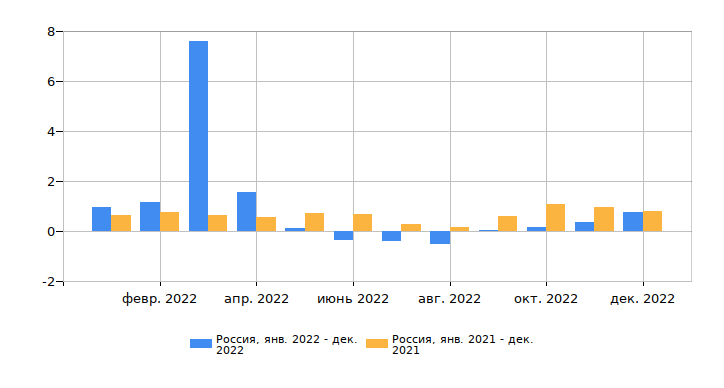

Прирост цен произошел в пределах инфляции и составил 9%

### Выводы и прогнозы

**В ходе проекта были проанализированы доходы медицинской организации, рассмотрена гипотеза изменения цен и сделаны следующие выводы:**

    1)Доходы выросли 1.6 раза
    2)Количество клиентов вырасло в 1.55 раз
    3)В 2022 году выросла доходность всех выделеных категорий
    4)За 2022/2021 доходы по полам соответствуют приросту числа посетителей
**Была высказана гипотеза о том, что увеличение стоимости услуг зависит от инфляции**
  В итоге было найдено, что прирост цен произошел в пределах параметров инфляции, выделеных Росстатом

**Прогноз на будущее**

Поскольку с 2021 по 2022 год изменение цен произошло в пределах инфляции, можно сделать вывод, что в дальнейшем будет наблюдаться схожая динамика в отношении изменения цен на услуги.